# **Introduction**
## The SIR Epidemic Model
SIR stands for susceptible, infected, and recovered (or removed). Infected people can infect susceptible people, but recovered people are immune and noncontagious, or possibly deceased. The model also provides three differential equations describing the movement of the population between these three groups. These three categories and the rules governing them are the basis of this low-level model.

## Implementation
To implement this model, we will take 3 steps:
### 1. Define the functions for the rates of change
For each variable $S$, $I$, and $R$, the model has an ordinary differential equation defining its derivative in terms of the itself and the other variables.
 
This simply means that given the current values of the three variables, you can calculate how much they will change after one timestep.

### 2. Define the initial conditions
To compute anything, we must define the total population and the the intial values of the variables $S$, $I$, and $R$. Generally, we would see about 99.9% of the population initially susceptible, 0.1% infected, and 0% recovered. The total population, $N$, can be any number and the behaviour should not change. We can also use 1 or 100 for $N$ to see the values of the variables as percents rather than actual numbers.

We will also need to define $\beta$ (beta) and $\gamma$ (gamma). These are parameters that alter the course of the disease. $\beta$ represents the rate of infection per interaction. $\gamma$ represents the rate of recovery for infected people. A higher $\beta$ and lower $\gamma$ worsens the epidemic, and vice versa. This makes sense intuitively because if the disease is less contagious, and people recover faster, it is much easier to contain.

> $\beta$ of 0.2 means in every interaction with an infected person, a susceptible person has a 20% chance of getting infected

> $\gamma$ of 0.1 ($\frac{1}{10}$) means it takes an infected person 10 days to recover.

### 3. Calculate the changes and their effects:
Over a range of time, ($0.0$ to $t_{max}$, incremented by $\Delta t$), we take the previous values of $S$, $I$, and $R$, and then calculate the change in each of them after one timestep. Now we take these changes and add them to the previous values to get the new ones. This process is described in more detail later.

> Ideally, I would be using a more complex model, analytical solutions to differential equations, and fitting the model to actual data. However, since I'm not an epidemiologist, I get a pass.



In [0]:
# Importing the packages we need for creating and manipulating data
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import clear_output

# **Creating the Model**

## Initializing Model Values
We set up the initial conditions
*   Initial infected
*   Initial susceptible as the rest of the population
*   Initial recovered as 0 people

## Defining Differential Equations
### Variables:
* $N$ is the total population
* $S$ is the current susceptible population
* $I$ is the current infected population
* $R$ is the current recovered population
* $\beta$ (beta) is the rate of infections per interaction
* $\gamma$ (gamma) is the rate of recovery for an infection

### Equations
* The rate of change for the susceptible population is
$$\frac{dS}{dt}=-\frac{\beta SI}{N}$$
$$Change\: in\: Susceptible = -New\: Infections$$
> Because of all the interactions between susceptible and infected people, a portion of the susceptible people become infected
* The rate of change for the infected population is
$$\frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I$$
$$Change\: in\: Infected = New\: Infections - New\: Recoveries$$
> The current number of active infections is increased by the new infections, and decreased by number of people recovering
* The rate of change for the recovered (removed) population is
$$\frac{dR}{dt}=\gamma I$$
$$Change\: in\: Recovered = New\: Recoveries$$
> The recovered population is the sum of all recoveries over time

* Additionally, we know that at any time the population will be constant.
$$S + I + R = N$$
$$dS + dI + dR = 0$$
> The sum of all the categories will be the population, and the sum of all changes will be zero because no people join or leave the population.

In [0]:
# Population of 100000
p = 100000

# Infected is 0.1% of the population
initial_infected = p / 1000
# Susceptible is everyone else
initial_susceptible = p - initial_infected
initial_recovered = 0

# Implementation of differential equations

# Change in susceptible
def dSdt(S, I, R):
  return -beta * S * I / p

# Change in infected
def dIdt(S, I, R):
  return (beta * S * I / p) - (gamma * I)

# Change in recovered
def dRdt(S, I, R):
  return gamma * I

print("Initial Infected: ", initial_infected)
print("Initial Susceptible ", initial_susceptible)
print("Initial Recovered: ", initial_recovered)

Initial Infected:  100.0
Initial Susceptible  99900.0
Initial Recovered:  0


We give initial values to $\beta$ and $\gamma$ and define our timespan

> `dt` is our artificial, finite $dt$ because we will use a numerical solution for the differential equations, not an analytical one

In [0]:
beta = 0.15
gamma = 0.06

dt = 0.001
max_time = 180
time = np.arange(0, max_time + dt, dt)

# **Simulation**
Now it's time to actually run the simulation, there are 2 steps
1. Create the lists for $S$, $I$, and $R$ over time, with the first elements being the initial conditions
2. At every time $t$

 a. Calculate the new variable values:
$$\Delta x = \frac{dx}{dt}(t) * \Delta t \\
x_{t} = x_{t-1} + \Delta x$$
  + $x$ represents $S$, $I$, and $R$
  + $\frac{dx}{dt}(t)$ represents the change we obtained from the differential equations at time $t$ (can also be thought of as slope)
  + $\Delta$ means "change in"

  b. Add new values to their respective lists

In [0]:
def simulate():
  S = [initial_susceptible]
  I = [initial_infected]
  R = [initial_recovered]
  for t in time[1:]:
    newS = S[-1] + dSdt(S[-1], I[-1], R[-1]) * dt
    newI = I[-1] + dIdt(S[-1], I[-1], R[-1]) * dt
    newR = R[-1] + dRdt(S[-1], I[-1], R[-1]) * dt
    S.append(newS)
    I.append(newI)
    R.append(newR)
  return S, I, R

# **Visualizing the results**
We create a new plot, with the $S$, $I$, and $R$ values on the y-axis and the time on the x-axis

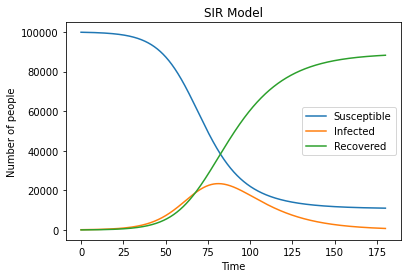

In [0]:
def visualize(b=None):
  fig, ax = plt.subplots()
  S, I, R = simulate()
  ax.set_title("SIR Model")
  ax.plot(time, S, label="Susceptible")
  ax.plot(time, I, label="Infected")
  ax.plot(time, R, label="Recovered")
  ax.set_xlabel("Time")
  ax.set_ylabel("Number of people")
  #ax.set_yscale("log")
  plt.legend()
visualize()

# **Configurable runs**
Here you can adjust any of the parameters and rerun the simulation to see how the affect the system

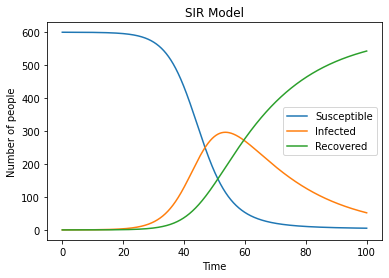

In [0]:
#@title Parameters {run:"auto"}

p = 600 #@param {type:"slider", min:0, max:100000, step:100}

percent_infected = 0.01 #@param {type:"slider", min:0, max:100, step:0.1}

beta = 0.25 #@param {type:"slider", min:0, max:2, step:0.01}
gamma = 0.04761904761 #@param {type:"slider", min:0, max:1, step:0.01}

dt = 0.0156 #@param {type:"slider", min:0, max:0.5, step:0.0001}
max_time = 100 #@param {type:"slider", min:0, max:300, step:1}
initial_infected = p * percent_infected * 0.01
initial_susceptible = p - initial_infected
initial_recovered = 0
time = np.arange(0, max_time + dt, dt)

clear_output()
visualize()